## **KNN(K-Nearest Neighbors)**
The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

The KNN algorithm is straightforward and easy to understand, making it a popular choice in various domains. However, its performance can be affected by the choice of K and the distance metric, so careful parameter tuning is necessary for optimal results.

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
zoo=pd.read_csv('/content/Zoo.csv')

In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
#checking Null Values
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
#checking Duplicated Values
zoo.duplicated().sum()

0

In [11]:
zoo.shape

(101, 18)

In [12]:
zoo.corr()

<ipython-input-12-121fd7667a4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<ipython-input-14-02febe35d9db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr())


<Axes: >

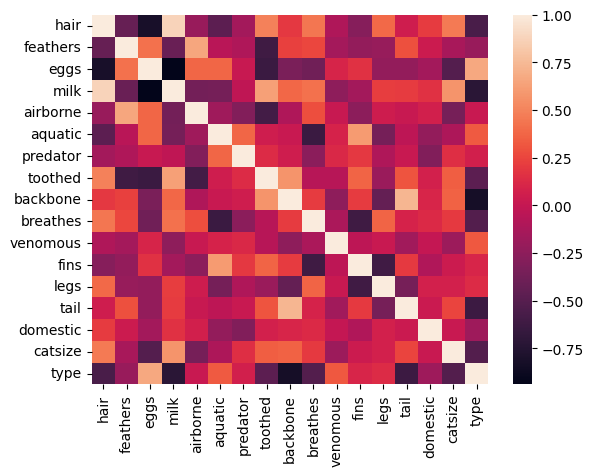

In [14]:
sns.heatmap(zoo.corr())

## Building KNearestNaighbor Model

### **KNN Model**
K-Fold Cross Validation
K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.

To achieve this K-Fold Cross Validation, we have to split the data set into three sets, Training, Testing, and Validation, with the challenge of the volume of the data.

Here Test and Train data set will support building model and hyperparameter assessments.

In which the model has been validated multiple times based on the value assigned as a parameter and which is called K and it should be an INTEGER.

Make it simple, based on the K value, the data set would be divided, and train/testing will be conducted in a sequence way equal to K time.

In [15]:
zoo.shape

(101, 18)

In [24]:
#first we need to split the data
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,-1]

In [25]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [26]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [27]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)

In [28]:
#standardizing the x values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [30]:
#first randomly selecting one number and checking its accuracy
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)

In [31]:
results=cross_val_score(knn,x_std,y,cv=kfold)

In [33]:
results.mean()

0.8300000000000001

## **Grid Search CV**
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

Cross-Validation and GridSearchCV
In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.

In [43]:
#lets do hyperparameter tuning for best k value
#for that am using GridsearchCV Model
from sklearn.model_selection import GridSearchCV
n=np.array(range(1,40))
param=dict(n_neighbors=n)

knn1=KNeighborsClassifier()

grid=GridSearchCV(estimator=knn1,param_grid=param,cv=10)

In [44]:
#fitting data to the Gridsearchcv model
grid.fit(x_std,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [48]:
#checking Accuracy
print(grid.best_score_)
print(grid.best_params_)

0.9509090909090909
{'n_neighbors': 1}


So As we saw Neighbor 1 is giving best Accuracy that is 95%.
lets do this in Other way


## Visualizing the CV results

In [50]:
k_value=np.array(range(1,40))

k_neighbor=[]

for k in  k_value:
  knn=KNeighborsClassifier(n_neighbors=k)
  result=cross_val_score(knn,x_std,y,cv=10)
  k_neighbor.append(result.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [52]:
kvalue=pd.DataFrame(k_neighbor)

In [53]:
kvalue

,0
0,0.950909
1,0.940000
2,0.930000
3,0.910000
4,0.940000
5,0.920000
6,0.920000
7,0.910000
8,0.890000
9,0.880000


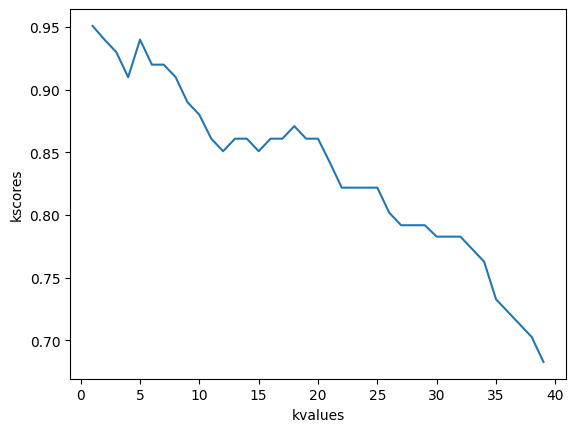

In [61]:
sns.lineplot(x=k_value,y=k_neighbor)
plt.xlabel('kvalues')
plt.ylabel('kscores')
plt.show()

In [63]:
result_final=pd.DataFrame({"Kvalues":k_value,'k_scores':k_neighbor})

In [64]:
result_final.sort_values("k_scores",ascending=False)

,Kvalues,k_scores
0,1,0.950909
4,5,0.940000
1,2,0.940000
2,3,0.930000
5,6,0.920000
6,7,0.920000
3,4,0.910000
7,8,0.910000
8,9,0.890000
9,10,0.880000
